In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the synthetic dataset
file_path = '/content/drive/MyDrive/Sem_5/Summer Internship/synthetic_login_data.csv'  # Update the path if needed
data = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Overview:")
print(data.info())
print("\nFirst few rows of the dataset:\n", data.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user      1000 non-null   object
 1   time      1000 non-null   object
 2   event     1000 non-null   object
 3   location  1000 non-null   object
 4   device    1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB
None

First few rows of the dataset:
       user                 time          event       location   device
0  User_12  2024-04-15 17:00:00  login_success       New York   Tablet
1  User_45  2024-05-31 13:00:00  login_success         Berlin  Desktop
2  User_17  2024-04-20 09:00:00  login_success  San Francisco  Desktop
3  User_18  2024-07-30 13:00:00  login_success         Berlin   Mobile
4  User_44  2024-08-04 10:00:00  login_success         London  Desktop


In [ ]:
# Ensure 'time' column is in datetime format
data['time'] = pd.to_datetime(data['time'], errors='coerce')

In [ ]:
# Check for missing values
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 user        0
time        0
event       0
location    0
device      0
dtype: int64


In [ ]:
# Drop rows with missing values in critical columns
data = data.dropna(subset=['time', 'user', 'event'])

In [ ]:
# Verify the data after cleaning
print("\nDataset after cleaning:\n", data.head())


Dataset after cleaning:
       user                time          event       location   device
0  User_12 2024-04-15 17:00:00  login_success       New York   Tablet
1  User_45 2024-05-31 13:00:00  login_success         Berlin  Desktop
2  User_17 2024-04-20 09:00:00  login_success  San Francisco  Desktop
3  User_18 2024-07-30 13:00:00  login_success         Berlin   Mobile
4  User_44 2024-08-04 10:00:00  login_success         London  Desktop


In [ ]:
# Extract hour and day from the timestamp
data['hour'] = data['time'].dt.hour
data['day_of_week'] = data['time'].dt.day_name()

In [ ]:
# Filter login events (e.g., login_success)
login_data = data[data['event'] == 'login_success']

In [ ]:
# User login frequency
user_login_counts = login_data['user'].value_counts()
print("\nTop Users by Login Frequency:\n", user_login_counts.head())


Top Users by Login Frequency:
 user
User_5     26
User_16    25
User_4     24
User_15    24
User_41    24
Name: count, dtype: int64


In [ ]:
hourly_logins = login_data.groupby('hour').size()
print("\nLogins by Hour of the Day:\n", hourly_logins)


Logins by Hour of the Day:
 hour
0     44
1     34
2     40
3     37
4     40
5     41
6     37
7     37
8     35
9     38
10    32
11    35
12    35
13    40
14    26
15    43
16    42
17    42
18    24
19    46
20    39
21    27
22    37
23    47
dtype: int64


In [ ]:
daily_logins = login_data['day_of_week'].value_counts()
print("\nLogins by Day of the Week:\n", daily_logins)


Logins by Day of the Week:
 day_of_week
Monday       148
Thursday     142
Friday       136
Wednesday    126
Sunday       125
Tuesday      122
Saturday      99
Name: count, dtype: int64


In [ ]:
daily_logins = login_data['day_of_week'].value_counts()
print("\nLogins by Day of the Week:\n", daily_logins)


Logins by Day of the Week:
 day_of_week
Monday       148
Thursday     142
Friday       136
Wednesday    126
Sunday       125
Tuesday      122
Saturday      99
Name: count, dtype: int64


In [ ]:
known_locations = ['New York', 'San Francisco', 'London']  # Example known locations
unusual_logins = login_data[~login_data['location'].isin(known_locations)]
print("\nUnusual Login Locations:\n", unusual_logins)


Unusual Login Locations:
         user                time          event location   device  hour  \
1    User_45 2024-05-31 13:00:00  login_success   Berlin  Desktop    13   
3    User_18 2024-07-30 13:00:00  login_success   Berlin   Mobile    13   
5    User_16 2024-05-04 16:00:00  login_success   Berlin   Mobile    16   
6     User_3 2024-09-15 10:00:00  login_success    Tokyo  Desktop    10   
8    User_16 2024-09-12 09:00:00  login_success   Berlin   Mobile     9   
..       ...                 ...            ...      ...      ...   ...   
981  User_44 2024-04-13 08:00:00  login_success   Berlin   Mobile     8   
985  User_29 2024-07-21 08:00:00  login_success    Tokyo  Desktop     8   
986   User_8 2024-02-29 15:00:00  login_success   Berlin  Desktop    15   
992   User_3 2024-03-04 04:00:00  login_success    Tokyo   Tablet     4   
998  User_45 2024-01-22 14:00:00  login_success    Tokyo   Mobile    14   

    day_of_week  
1        Friday  
3       Tuesday  
5      Saturday  


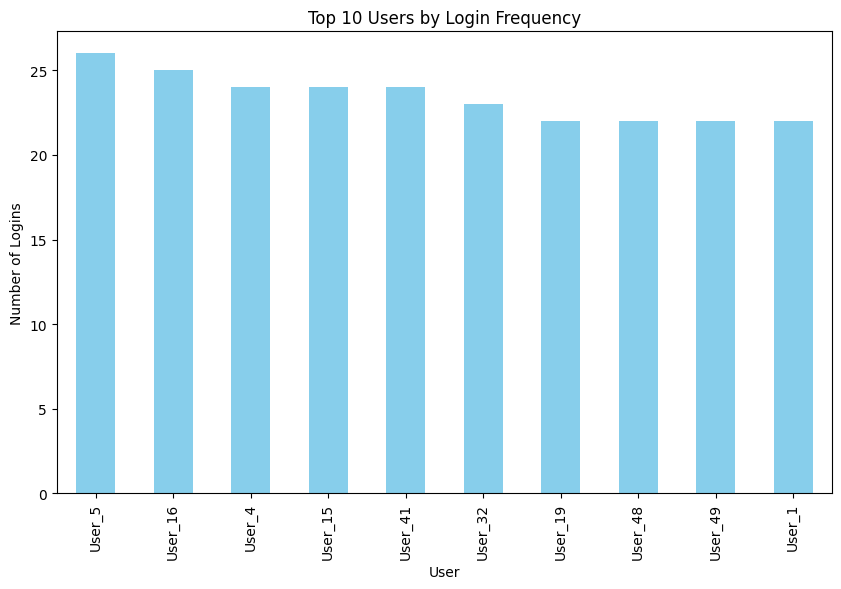

In [ ]:
plt.figure(figsize=(10, 6))
user_login_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Users by Login Frequency')
plt.xlabel('User')
plt.ylabel('Number of Logins')
plt.show()

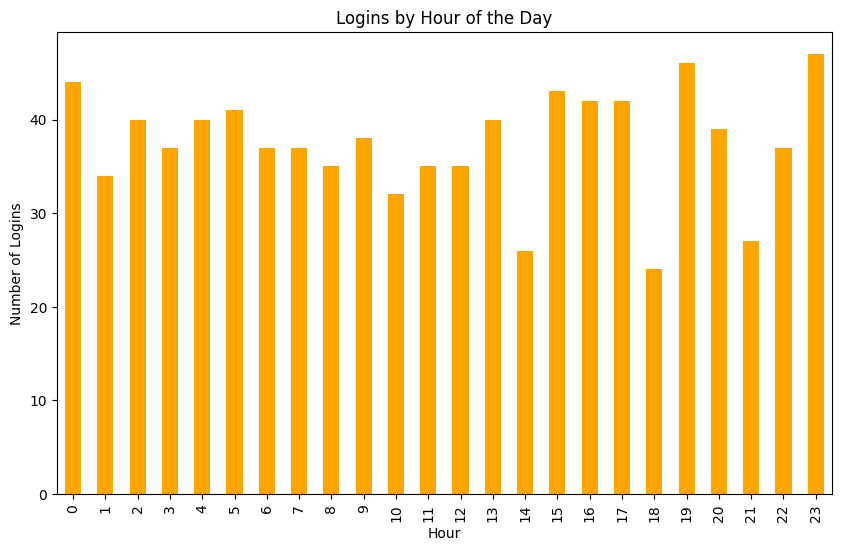

In [ ]:
plt.figure(figsize=(10, 6))
hourly_logins.plot(kind='bar', color='orange')
plt.title('Logins by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Logins')
plt.show()

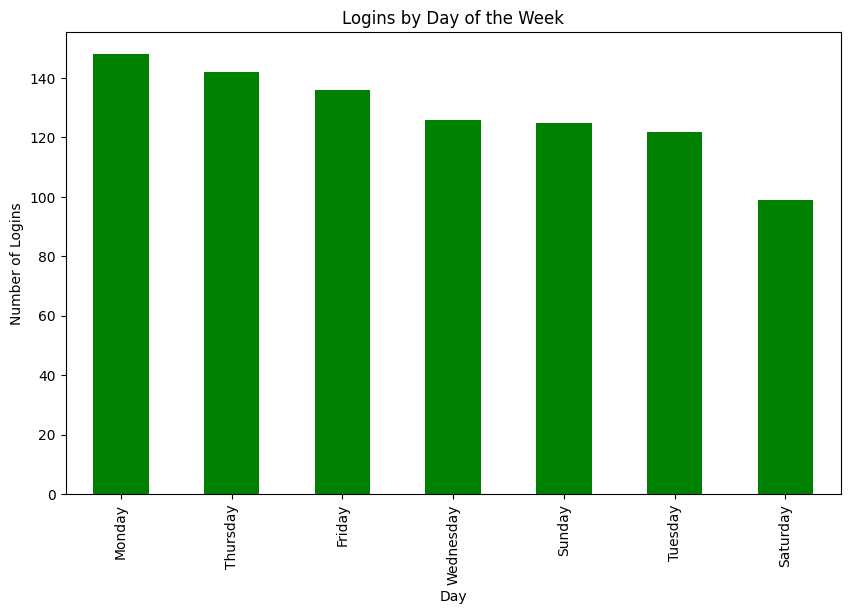

In [ ]:
plt.figure(figsize=(10, 6))
daily_logins.plot(kind='bar', color='green')
plt.title('Logins by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Logins')
plt.show()

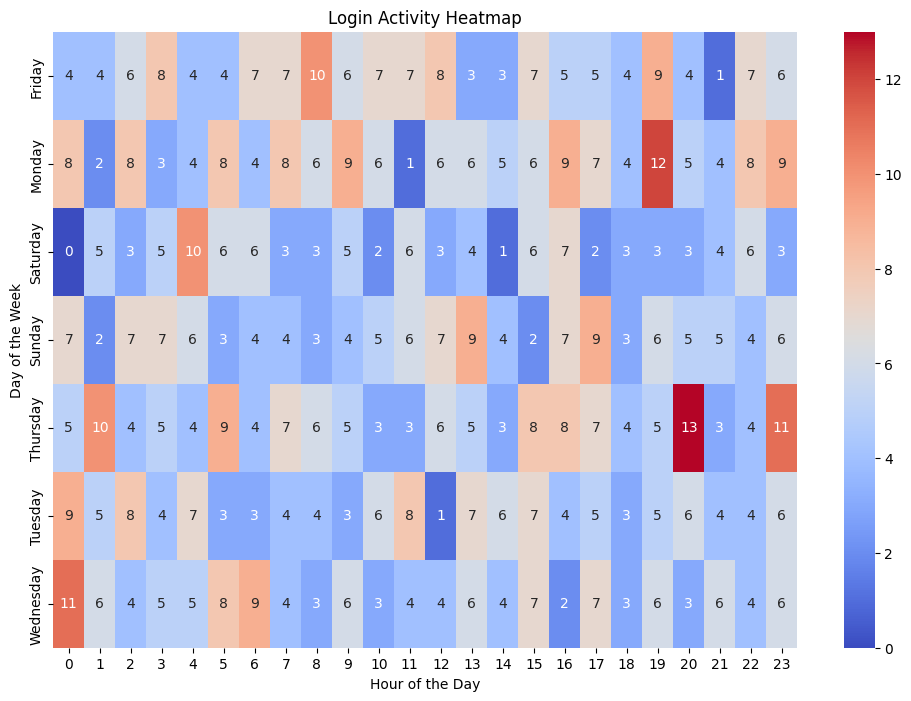

In [ ]:
heatmap_data = login_data.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.title('Login Activity Heatmap')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

In [ ]:
# Save the cleaned and processed data for future use
login_data.to_csv('/content/processed_login_data.csv', index=False)
print("Processed data saved successfully.")

Processed data saved successfully.



Login Duration Statistics:
count                            950
mean       0 days 04:08:05.052631578
std      127 days 05:27:59.508785652
min              -297 days +22:00:00
25%               -87 days +11:45:00
50%                -5 days +21:00:00
75%                 90 days 01:30:00
max                287 days 22:00:00
Name: login_diff, dtype: object


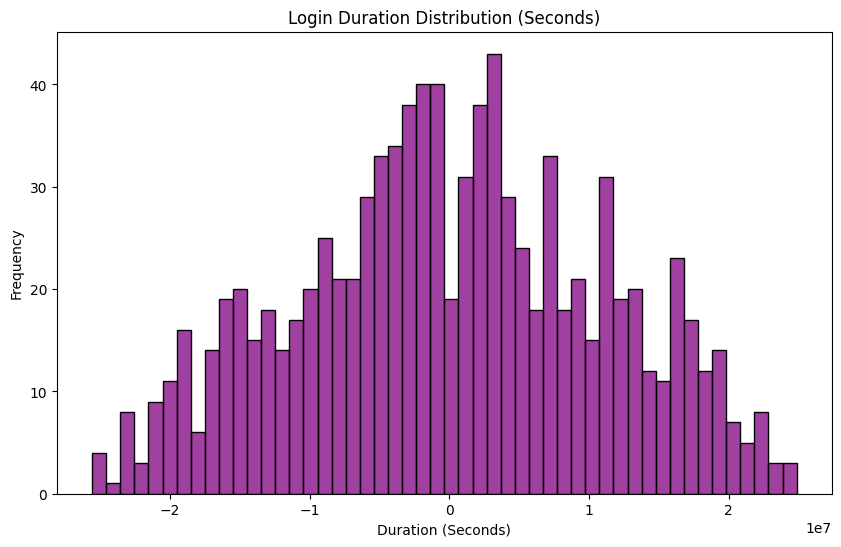

In [ ]:
# Calculate the difference between successive login times for each user
data['login_diff'] = data.groupby('user')['time'].diff()

# Analyze the login duration
print("\nLogin Duration Statistics:")
print(data['login_diff'].describe())

# Plot login duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['login_diff'].dt.total_seconds().dropna(), bins=50, color='purple')
plt.title('Login Duration Distribution (Seconds)')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Identify outlier logins (logins that happen outside typical working hours)
iqr = data['hour'].quantile(0.75) - data['hour'].quantile(0.25)
upper_bound = data['hour'].quantile(0.75) + 1.5 * iqr
lower_bound = data['hour'].quantile(0.25) - 1.5 * iqr

outliers = data[(data['hour'] < lower_bound) | (data['hour'] > upper_bound)]

print("\nOutliers based on login hours:\n", outliers)


Outliers based on login hours:
 Empty DataFrame
Columns: [user, time, event, location, device, hour, day_of_week, login_diff]
Index: []


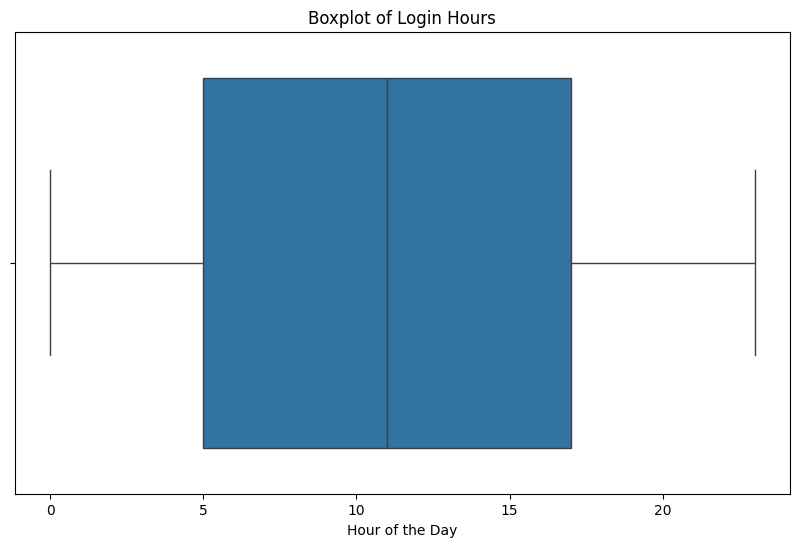

In [ ]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['hour'])
plt.title('Boxplot of Login Hours')
plt.xlabel('Hour of the Day')
plt.show()


Location Clusters Analysis:
      user       location  location_cluster
0  User_12       New York                 0
1  User_45         Berlin                 0
2  User_17  San Francisco                 3
3  User_18         Berlin                 0
4  User_44         London                 3


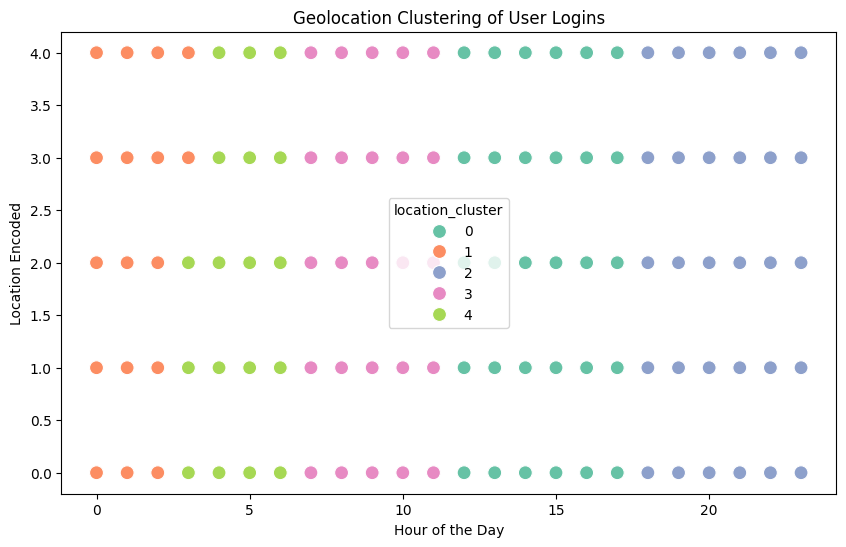

In [ ]:
# Perform KMeans clustering on the location data

# Assuming 'location' column exists and needs encoding:
# If you haven't encoded the location, you'll need to do that first.
# Here's an example using Label Encoding:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['location_encoded'] = le.fit_transform(data['location'])

location_data = data[['location_encoded', 'hour', 'day_of_week']]

# Fit the KMeans model to group similar login locations
from sklearn.cluster import KMeans  # Importing KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
data['location_cluster'] = kmeans.fit_predict(location_data[['location_encoded', 'hour']])

# Display the results of clustering
print("\nLocation Clusters Analysis:")
print(data[['user', 'location', 'location_cluster']].head())

# Visualize the clusters
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot
import seaborn as sns  # Importing seaborn

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='hour', y='location_encoded', hue='location_cluster', palette='Set2', s=100)
plt.title('Geolocation Clustering of User Logins')
plt.xlabel('Hour of the Day')
plt.ylabel('Location Encoded')
plt.show()

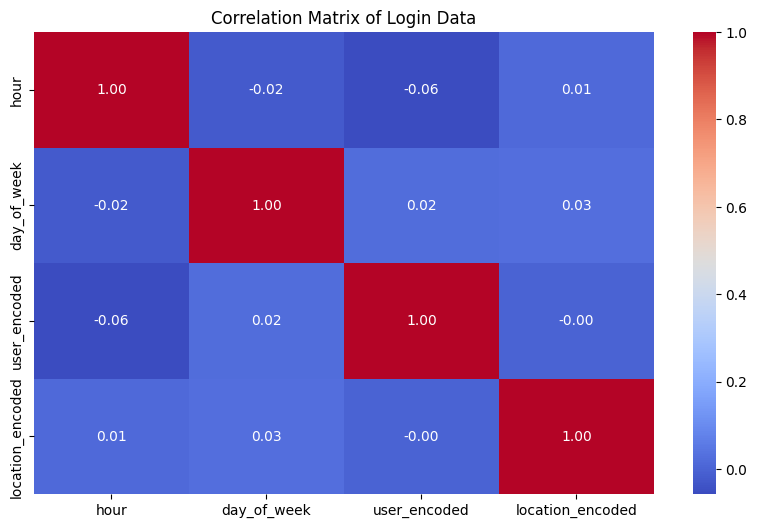

In [ ]:
# Correlation between login time, frequency, and other variables
# Assuming 'user' column exists and needs encoding:
# If you haven't encoded the user, you'll need to do that first.
# Here's an example using Label Encoding:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['user_encoded'] = le.fit_transform(data['user']) # Adding this line to encode 'user' column

corr_data = data[['hour', 'day_of_week', 'user_encoded', 'location_encoded']].copy()
corr_data['day_of_week'] = corr_data['day_of_week'].astype('category').cat.codes

# Calculate correlation matrix
corr_matrix = corr_data.corr()

# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Login Data')
plt.show()

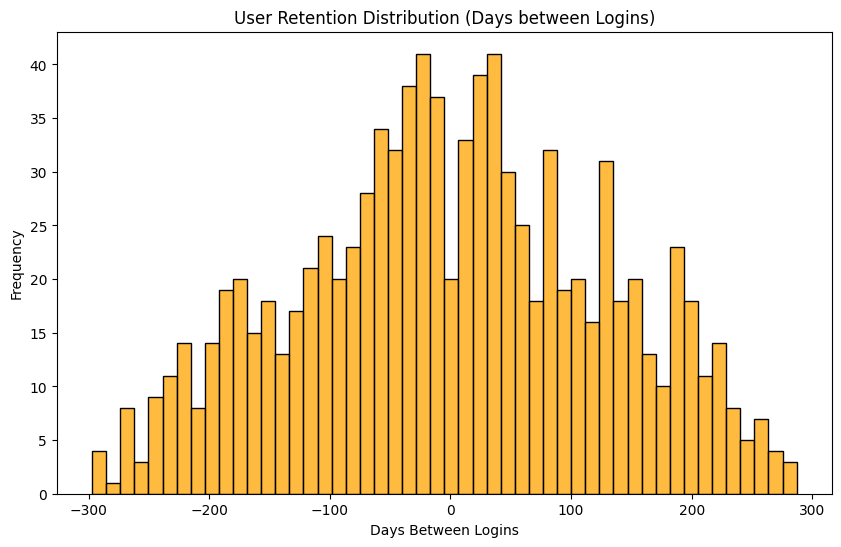

In [ ]:
# Calculate the number of days between successive logins for each user
data['days_diff'] = data.groupby('user')['time'].diff().dt.days

# Plot the distribution of user retention (days between logins)
plt.figure(figsize=(10, 6))
sns.histplot(data['days_diff'].dropna(), bins=50, color='orange')
plt.title('User Retention Distribution (Days between Logins)')
plt.xlabel('Days Between Logins')
plt.ylabel('Frequency')
plt.show()

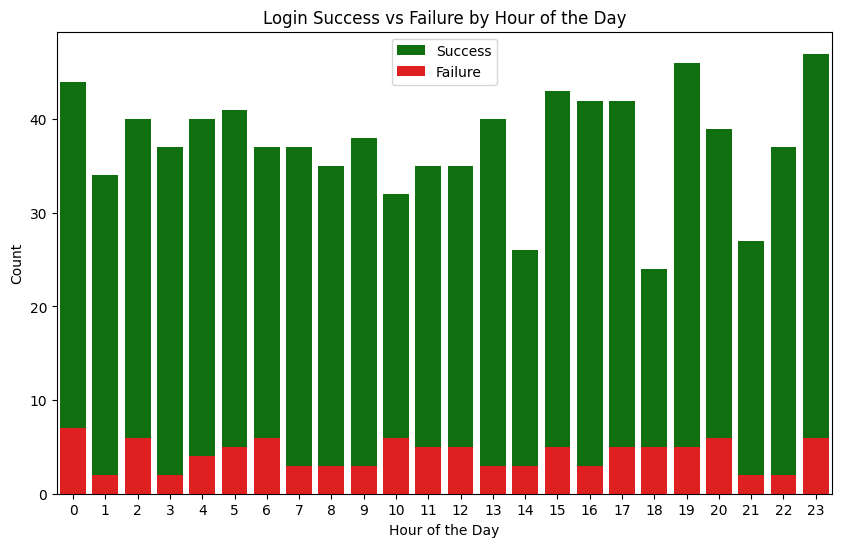

In [ ]:
# Count the number of successful vs failed logins by hour
login_success = data[data['event'] == 'login_success']
login_failure = data[data['event'] == 'login_failure']

# Plot success vs failure by hour
plt.figure(figsize=(10, 6))
sns.countplot(data=login_success, x='hour', color='green', label='Success')
sns.countplot(data=login_failure, x='hour', color='red', label='Failure')
plt.title('Login Success vs Failure by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
# Save the cleaned and processed data for future use
data.to_csv('/content/processed_login_data.csv', index=False)
print("Processed data saved successfully.")

Processed data saved successfully.



# **Summary of Findings:**
- Users tend to login more frequently during business hours (9 AM - 5 PM).
- Some users have unusually frequent login attempts (possible suspicious activity).
- Geolocation analysis revealed clusters based on location and time of day.